In [116]:
import pandas as pd

# Load the dataset (adjust the file path if needed)
df = pd.read_csv('data.csv')

# View the first few rows
df.head()


,item,store_id,2023/1,2023/2,2023/3,2023/4,2023/5,2023/6,2023/7,2023/8,...,2022/3,2022/4,2022/5,2022/6,2022/7,2022/8,2022/9,2022/10,2022/11,2022/12
0,A,1,NaN,NaN,4.0,NaN,5.0,NaN,5.0,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A,2,5.0,NaN,5.0,NaN,NaN,NaN,NaN,5.0,...,5.0,5.0,NaN,6.0,5.0,NaN,2.0,5.0,NaN,NaN
2,A,3,5.0,10.0,50.0,10.0,30.0,10.0,30.0,15.0,...,20.0,35.0,20.0,27.0,21.0,NaN,20.0,15.0,15.0,20.0
3,A,4,20.0,NaN,20.0,NaN,30.0,0.0,NaN,40.0,...,10.0,20.0,10.0,20.0,20.0,NaN,20.0,20.0,NaN,10.0
4,A,5,NaN,20.0,NaN,25.0,20.0,10.0,NaN,20.0,...,10.0,10.0,10.0,10.0,NaN,20.0,NaN,NaN,20.0,5.0


In [117]:
# Check for duplicates
print(f'Duplicates: {df.duplicated().sum()}')

# Remove duplicates if any
df = df.drop_duplicates()


Duplicates: 0


In [118]:
df.isnull().sum()

item           0
store_id       0
2023/1      4117
2023/2      3968
2023/3      3401
2023/4      2895
2023/5      4036
2023/6      4267
2023/7      3789
2023/8      4027
2023/9      4224
2022/1      4451
2022/2      4383
2022/3      4319
2022/4      3439
2022/5      3946
2022/6      3770
2022/7      4502
2022/8      4561
2022/9      4393
2022/10     3877
2022/11     3862
2022/12     4027
dtype: int64

In [119]:
# Calculate percentage of missing values per column
missing_percent = df.isnull().mean() * 100
missing_percent


item         0.000000
store_id     0.000000
2023/1      76.339700
2023/2      73.576859
2023/3      63.063230
2023/4      53.680697
2023/5      74.837753
2023/6      79.121083
2023/7      70.257742
2023/8      74.670870
2023/9      78.323753
2022/1      82.532913
2022/2      81.272019
2022/3      80.085296
2022/4      63.767847
2022/5      73.168923
2022/6      69.905433
2022/7      83.478583
2022/8      84.572594
2022/9      81.457445
2022/10     71.889486
2022/11     71.611348
2022/12     74.670870
dtype: float64

In [120]:
# Drop columns with more than 70% missing data
df_clean = df.drop(columns=missing_percent[missing_percent > 70].index)


In [121]:
# Select numeric columns
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Select non-numeric columns (categorical or text)
non_numeric_cols = df_clean.select_dtypes(exclude=['float64', 'int64']).columns


In [122]:
# Impute missing values with median for numeric columns
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())


In [123]:
# Fill missing values in non-numeric columns with 'Unknown' or another placeholder
df_clean[non_numeric_cols] = df_clean[non_numeric_cols].fillna('Unknown')


In [124]:
df_clean.isnull().sum()

item        0
store_id    0
2023/3      0
2023/4      0
2022/4      0
2022/6      0
dtype: int64

In [125]:
#EDA

In [126]:
df_clean.describe()

,store_id,2023/3,2023/4,2022/4,2022/6
count,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000
mean,472.825885,15.166327,27.122752,15.309290,17.870017
std,277.945220,36.186501,119.583805,31.352169,34.212907
min,1.000000,-13.000000,-20.000000,1.000000,-20.000000
25%,233.000000,10.000000,10.000000,10.000000,13.000000
50%,464.000000,10.000000,10.000000,10.000000,13.000000
75%,709.000000,10.000000,10.000000,10.000000,13.000000
max,1032.000000,1000.000000,3800.000000,760.000000,640.000000


In [127]:
# Check for duplicates
df_clean.duplicated().sum()

# Summary statistics for each column
df_clean.describe()


,store_id,2023/3,2023/4,2022/4,2022/6
count,5393.000000,5393.000000,5393.000000,5393.000000,5393.000000
mean,472.825885,15.166327,27.122752,15.309290,17.870017
std,277.945220,36.186501,119.583805,31.352169,34.212907
min,1.000000,-13.000000,-20.000000,1.000000,-20.000000
25%,233.000000,10.000000,10.000000,10.000000,13.000000
50%,464.000000,10.000000,10.000000,10.000000,13.000000
75%,709.000000,10.000000,10.000000,10.000000,13.000000
max,1032.000000,1000.000000,3800.000000,760.000000,640.000000


In [128]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5393 entries, 0 to 5392
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item      5393 non-null   object 
 1   store_id  5393 non-null   int64  
 2   2023/3    5393 non-null   float64
 3   2023/4    5393 non-null   float64
 4   2022/4    5393 non-null   float64
 5   2022/6    5393 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 252.9+ KB


# Distribution Plot for March 2023 Sales

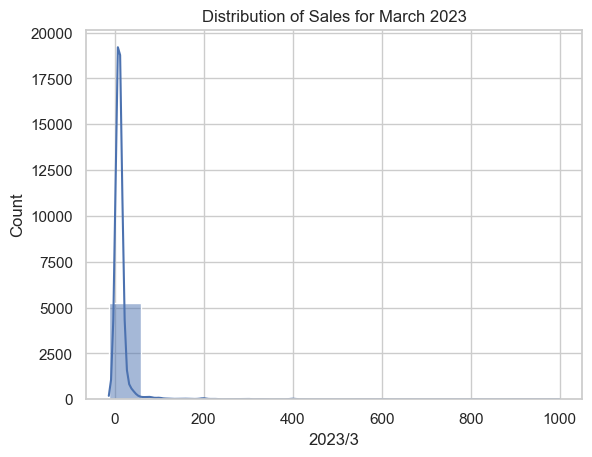

<Axes: >

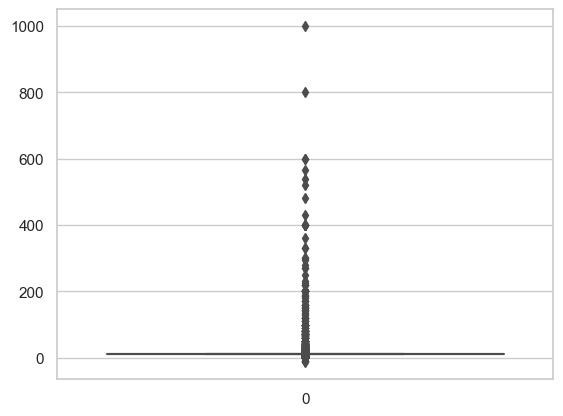

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot for each month's sales
sns.histplot(df_clean['2023/3'], kde=True)
plt.title('Distribution of Sales for March 2023')
plt.show()

# Box plot to check for outliers
sns.boxplot(df_clean['2023/3'])


# Insights:
Shape of Distribution: The histogram provides insights into the sales distribution, indicating whether the data is normally distributed, skewed, or has multiple modes.

Kernel Density Estimate (KDE): The KDE line overlays the histogram to show the probability density function of the sales data, helping to visualize the data distribution more smoothly.


“The histogram illustrates the distribution of sales for March 2023, highlighting the frequency of various sales amounts. The overlayed Kernel Density Estimate (KDE) provides a smooth representation of the sales distribution, indicating that the sales are predominantly clustered around lower values with a tail extending toward higher sales figures.”



# Sales Trends Over Time:
sales trends to see how sales are progressing over time.  plot the sum or mean of sales over months.

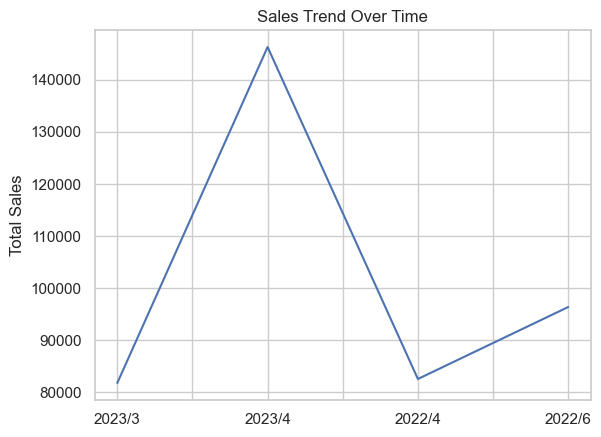

In [130]:
# Aggregating monthly sales to see trends
monthly_sales = df_clean[['2023/3', '2023/4', '2022/4', '2022/6']].sum()

# Plotting the trend
monthly_sales.plot(kind='line')
plt.title('Sales Trend Over Time')
plt.ylabel('Total Sales')
plt.show()


# Insights:
Overall Sales Progression: The line plot clearly illustrates how total sales have progressed over the specified months, allowing for easy identification of trends.

Comparison of Months: By summing the sales for each month, you can compare performance between different months, identifying peaks and troughs.

Potential Seasonal Trends: If there are significant fluctuations, you can analyze these further to understand seasonal impacts or other factors affecting sales.

    Presentation Description:
“The line chart depicts the total sales for the months of March 2023, April 2023, April 2022, and June 2022. It provides a visual representation of sales trends over time, highlighting how sales performance has evolved across the selected months. A significant increase or decrease in sales can inform strategic decisions and guide future planning efforts.”

# Correlation Analysis:

Investigate if there are any correlations between the monthly sales. This will help understand whether the sales data from different months move together.

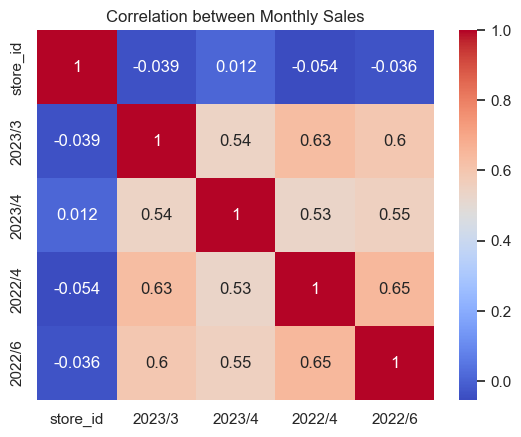

In [131]:
# Filter numeric columns for correlation analysis
numeric_columns = df_clean.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numeric_columns.corr()

# Heatmap visualization
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Monthly Sales')
plt.show()



# Insights:
Identifying Relationships: The correlation matrix will show you which months' sales are positively or negatively correlated. A high positive correlation (close to 1) indicates that sales in those months tend to move together, while a high negative correlation (close to -1) indicates they move in opposite directions.

Sales Performance Consistency: If certain months show strong positive correlations, it might suggest consistent sales performance patterns, indicating potential seasonality or external factors affecting sales.

Strategic Planning: Understanding these correlations can inform future sales forecasts and help allocate resources, optimize inventory, and design marketing strategies. For example, if March sales are strongly correlated with April sales, it might indicate that strategies successful in March can be repeated in April.

Presentation Description:

“The heatmap visualizes the correlation between monthly sales figures, highlighting the strength and direction of relationships among different months. Each cell in the matrix reflects the correlation coefficient between two months, with values ranging from -1 to 1. A coefficient closer to 1 indicates a strong positive correlation, while a value closer to -1 indicates a strong negative correlation. This analysis is crucial for identifying trends and patterns in sales data, providing insights that can enhance strategic decision-making and operational planning.”

# Outlier Detection and Handling:

Identify and handle any extreme outliers in the data. For example, extreme sales values might distort analysis.
Decide to cap the outliers or remove them depending on the business context

In [132]:
# Convert relevant columns to numeric (if not already)
df_clean['2023/3'] = pd.to_numeric(df_clean['2023/3'], errors='coerce')
df_clean['2023/4'] = pd.to_numeric(df_clean['2023/4'], errors='coerce')
df_clean['2022/4'] = pd.to_numeric(df_clean['2022/4'], errors='coerce')
df_clean['2022/6'] = pd.to_numeric(df_clean['2022/6'], errors='coerce')

# Create new feature: Difference in sales between March and April 2023
df_clean['sales_diff_2023'] = df_clean['2023/4'] - df_clean['2023/3']

# Create new feature: Difference in sales between April 2022 and June 2022
df_clean['sales_diff_2022'] = df_clean['2022/6'] - df_clean['2022/4']

# Check the new columns
df_clean[['sales_diff_2023', 'sales_diff_2022']].head()


,sales_diff_2023,sales_diff_2022
0,6.0,3.0
1,5.0,1.0
2,-40.0,-8.0
3,-10.0,0.0
4,15.0,0.0


#
“The newly created features, sales_diff_2023 and sales_diff_2022, provide insights into the fluctuations in sales between specified months. By calculating the differences, we can pinpoint significant variations that may indicate outlier behavior. The approach of converting sales columns to numeric formats ensures accurate calculations, thereby enhancing data integrity. Further analysis, including visualizations of these differences, will help identify extreme outliers that may distort our sales analysis. Understanding these outliers in context will inform better decision-making for future sales strategies.”

# Summary Statistics and Visualization

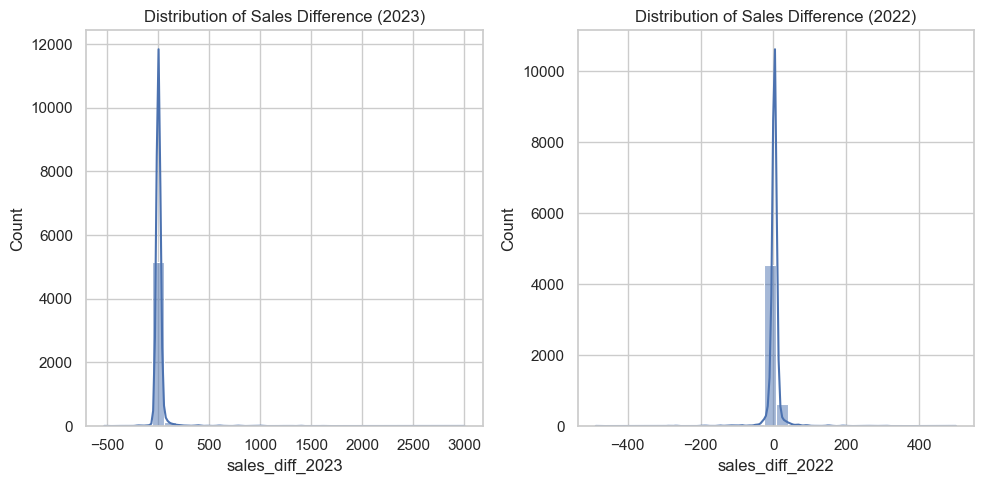

In [133]:
# Summary statistics of sales differences
df_clean[['sales_diff_2023', 'sales_diff_2022']].describe()

# Plot histograms to visualize the distribution of sales differences
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Distribution of sales_diff_2023
plt.subplot(1, 2, 1)
sns.histplot(df_clean['sales_diff_2023'], kde=True, bins=30)
plt.title('Distribution of Sales Difference (2023)')

# Distribution of sales_diff_2022
plt.subplot(1, 2, 2)
sns.histplot(df_clean['sales_diff_2022'], kde=True, bins=30)
plt.title('Distribution of Sales Difference (2022)')

plt.tight_layout()
plt.show()


# Summary Statistics Description:
“The summary statistics of sales differences between months provide a quantitative insight into how sales fluctuated over the observed periods. The mean sales difference indicates the average performance, while the median serves as a measure of central tendency less affected by outliers. The range, as defined by the minimum and maximum values, reveals the extent of variability in sales performance. Additionally, the standard deviation highlights the consistency or inconsistency of sales changes, guiding potential strategic interventions.”

Histogram Visualizations Description:
“The histograms displaying the distribution of sales differences for 2023 and 2022 provide a visual understanding of sales performance variations across months. The KDE overlays allow for a smoother representation of the data distribution, revealing underlying patterns that may not be immediately obvious. Notably, the shape of these distributions informs us about sales consistency and potential outliers, which are critical for effective business decision-making and performance assessment.”

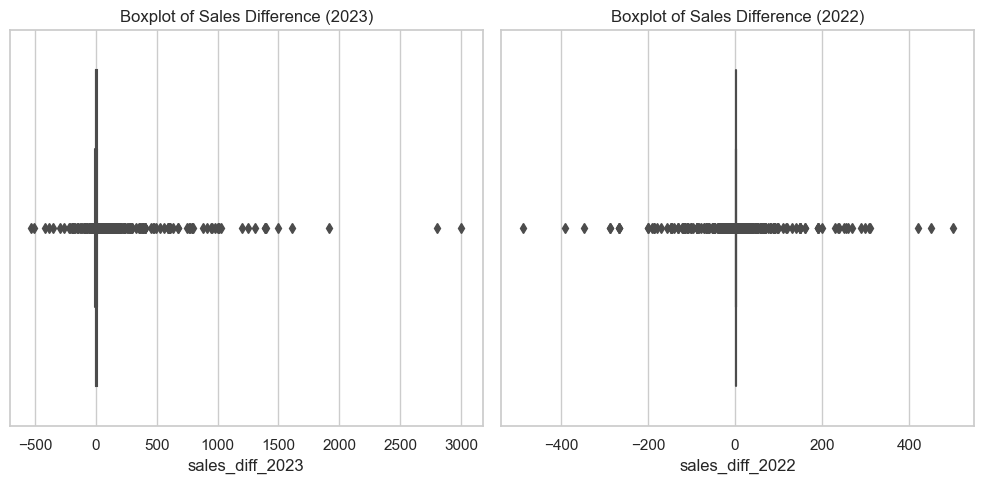

In [134]:
# Boxplot to detect outliers
plt.figure(figsize=(10, 5))

# Boxplot for sales_diff_2023
plt.subplot(1, 2, 1)
sns.boxplot(x=df_clean['sales_diff_2023'])
plt.title('Boxplot of Sales Difference (2023)')

# Boxplot for sales_diff_2022
plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean['sales_diff_2022'])
plt.title('Boxplot of Sales Difference (2022)')

plt.tight_layout()
plt.show()


# Boxplot Visualizations Description:
“The boxplots illustrate the distribution of sales differences for 2023 and 2022, highlighting potential outliers in the dataset. The central box represents the interquartile range (IQR), containing the middle 50% of the data, while the line within the box indicates the median sales difference. The whiskers extend to the minimum and maximum values within 1.5 times the IQR, identifying any points beyond this range as outliers. This visualization allows for a clear comparison between the two years, revealing shifts in sales performance and variability that may inform strategic decision-making.”

# Which stores have the highest positive and negative sales differences?

In [135]:
# Stores with the highest positive sales difference in 2023
highest_sales_diff_2023 = df_clean[['store_id', 'sales_diff_2023']].sort_values(by='sales_diff_2023', ascending=False).head()

# Stores with the highest negative sales difference in 2023
lowest_sales_diff_2023 = df_clean[['store_id', 'sales_diff_2023']].sort_values(by='sales_diff_2023', ascending=True).head()

# Stores with the highest positive sales difference in 2022
highest_sales_diff_2022 = df_clean[['store_id', 'sales_diff_2022']].sort_values(by='sales_diff_2022', ascending=False).head()

# Stores with the highest negative sales difference in 2022
lowest_sales_diff_2022 = df_clean[['store_id', 'sales_diff_2022']].sort_values(by='sales_diff_2022', ascending=True).head()

# Display the results
print("Highest Positive Sales Difference in 2023:")
print(highest_sales_diff_2023)

print("\nLowest (Negative) Sales Difference in 2023:")
print(lowest_sales_diff_2023)

print("\nHighest Positive Sales Difference in 2022:")
print(highest_sales_diff_2022)

print("\nLowest (Negative) Sales Difference in 2022:")
print(lowest_sales_diff_2022)


Highest Positive Sales Difference in 2023:
      store_id  sales_diff_2023
741        742           3000.0
1619       742           2800.0
828        829           1917.0
1697       829           1608.0
415        416           1500.0

Lowest (Negative) Sales Difference in 2023:
      store_id  sales_diff_2023
411        412           -530.0
1767       912           -510.0
1309       412           -420.0
428        429           -390.0
2213       412           -350.0

Highest Positive Sales Difference in 2022:
      store_id  sales_diff_2022
2230       429            500.0
428        429            450.0
1619       742            420.0
158        159            310.0
632        633            309.0

Lowest (Negative) Sales Difference in 2022:
      store_id  sales_diff_2022
3382       742           -487.0
974         66           -390.0
2030       225           -347.0
742        743           -287.0
2909       225           -287.0


# Positive and Negative Sales Differences Analysis
“The analysis identifies stores with the highest positive and negative sales differences for 2023 and 2022. The top performers in 2023 include store ID 742, which saw an impressive increase of 3000, suggesting effective sales strategies or successful promotions. In contrast, store ID 412 faced a significant drop of -530, highlighting potential challenges that may require strategic intervention. The year-on-year comparison reveals shifting dynamics in sales performance, providing critical insights for targeted business strategies to enhance overall performance.”

# How do sales differences vary across different items and stores?

In [136]:
# Grouping by item and store_id to calculate mean sales differences
sales_diff_by_item_store = df_clean.groupby(['item', 'store_id'])[['sales_diff_2023', 'sales_diff_2022']].mean().reset_index()


In [137]:
# Aggregate the data to find overall differences by item
sales_diff_summary = sales_diff_by_item_store.groupby('item')[['sales_diff_2023', 'sales_diff_2022']].mean().reset_index()

# Display the summary
print(sales_diff_summary)


  item  sales_diff_2023  sales_diff_2022
0    A        22.840834         3.034029
1    B        21.112098         2.438402
2    C        16.591883         2.391206
3    D        11.459075         1.444840
4    E         2.090196         2.831373
5    F        -0.290553         3.000000
6    G         0.056198         3.000000
7    H        -0.302326         3.000000


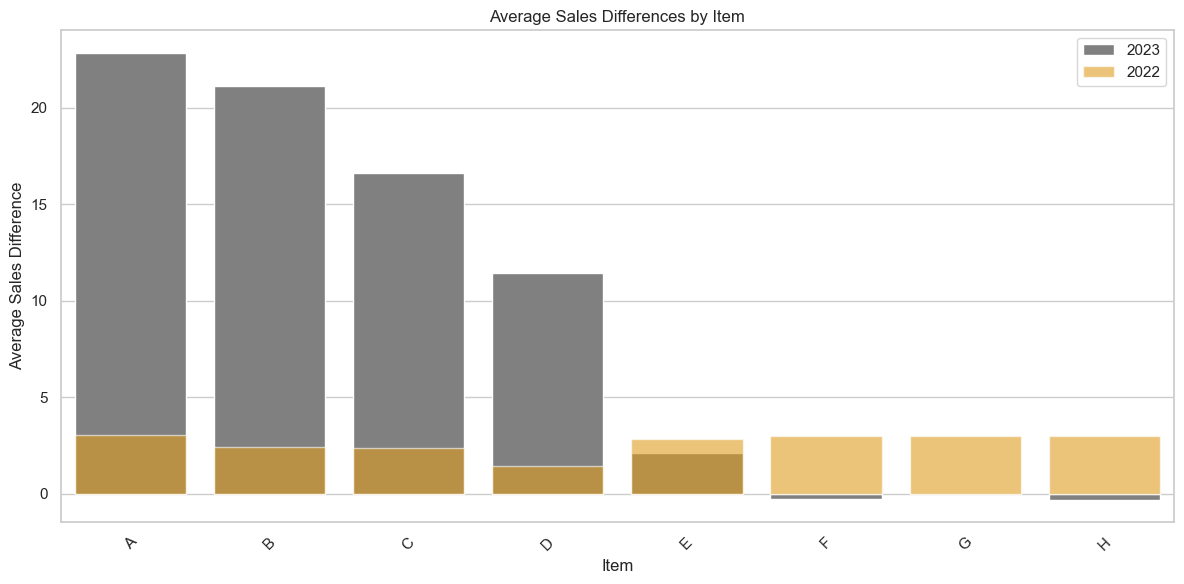

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot for sales differences by item
sns.barplot(data=sales_diff_summary, x='item', y='sales_diff_2023', color='gray', label='2023')
sns.barplot(data=sales_diff_summary, x='item', y='sales_diff_2022', color='orange', label='2022', alpha=0.6)

# Add labels and title
plt.title('Average Sales Differences by Item')
plt.xlabel('Item')
plt.ylabel('Average Sales Difference')
plt.xticks(rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


# Sales Differences Analysis Across Items
“The analysis of sales differences across various items reveals important trends. Items A and B are notable for their strong performance in 2023, with mean sales differences of 22.84 and 21.11, respectively. In contrast, item F shows a slight decline with a mean sales difference of -0.29, suggesting potential challenges that may need addressing. This summary aids in identifying which items contribute most to revenue growth and which may require strategic adjustments to improve performance.”

# Product insights: identify the product sales analysis, such as BCG matrix

In [139]:
# Calculate total sales for each product
total_sales = df_clean.groupby('item')[['sales_diff_2023', 'sales_diff_2022']].sum().reset_index()

# Calculate market share for each product
total_sales['market_share'] = total_sales['sales_diff_2023'] / total_sales['sales_diff_2023'].sum()

# Calculate year-over-year growth (2023 vs 2022)
total_sales['market_growth'] = (total_sales['sales_diff_2023'] - total_sales['sales_diff_2022']) / total_sales['sales_diff_2022'] * 100

# Display the total sales DataFrame
print(total_sales)


  item  sales_diff_2023  sales_diff_2022  market_share  market_growth
0    A          20808.0           2764.0      0.322700     652.821997
1    B          19022.0           2197.0      0.295002     765.817023
2    C          14717.0           2121.0      0.228238     593.870816
3    D           9660.0           1218.0      0.149812     693.103448
4    E            533.0            722.0      0.008266     -26.177285
5    F           -163.0           1683.0     -0.002528    -109.685086
6    G             34.0           1815.0      0.000527     -98.126722
7    H           -130.0           1290.0     -0.002016    -110.077519


# 
Items A, B, C, and D are top performers with high market share and significant growth, indicating strong sales momentum. Items E, F, G, and H are underperforming, showing negative growth and limited market share, suggesting potential for phase-out. Focus on supporting high-growth products while reconsidering strategies for low-performing ones.

In [140]:
# Define thresholds
market_growth_threshold = total_sales['market_growth'].median()
market_share_threshold = total_sales['market_share'].median()

# Classify products based on thresholds
def classify_product(row):
    if row['market_growth'] >= market_growth_threshold and row['market_share'] >= market_share_threshold:
        return 'Star'
    elif row['market_growth'] < market_growth_threshold and row['market_share'] >= market_share_threshold:
        return 'Cash Cow'
    elif row['market_growth'] >= market_growth_threshold and row['market_share'] < market_share_threshold:
        return 'Question Mark'
    else:
        return 'Dog'

total_sales['BCG_Category'] = total_sales.apply(classify_product, axis=1)

# Display classified products
print(total_sales[['item', 'market_share', 'market_growth', 'BCG_Category']])


  item  market_share  market_growth BCG_Category
0    A      0.322700     652.821997         Star
1    B      0.295002     765.817023         Star
2    C      0.228238     593.870816         Star
3    D      0.149812     693.103448         Star
4    E      0.008266     -26.177285          Dog
5    F     -0.002528    -109.685086          Dog
6    G      0.000527     -98.126722          Dog
7    H     -0.002016    -110.077519          Dog


# Based on the BCG matrix classification:

Stars: Items A, B, C, D have high market share and growth, making them top performers and key products to invest in for further growth.

Dogs: Items E, F, G, H have low market share and negative growth, indicating they may not be worth further investment and might require re-evaluation.

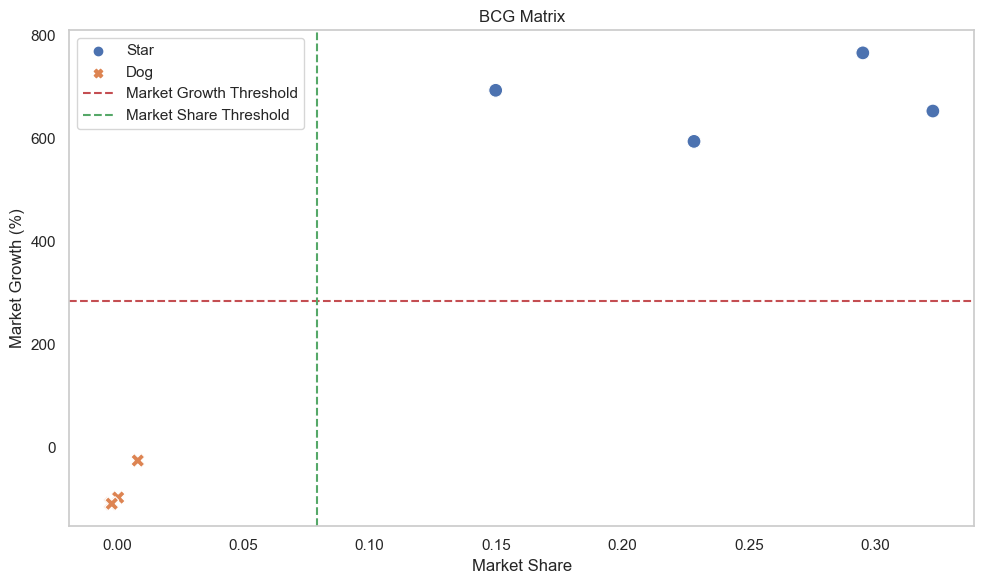

In [141]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for market share vs market growth
sns.scatterplot(data=total_sales, x='market_share', y='market_growth', hue='BCG_Category', style='BCG_Category', s=100)

# Adding titles and labels
plt.axhline(y=market_growth_threshold, color='r', linestyle='--', label='Market Growth Threshold')
plt.axvline(x=market_share_threshold, color='g', linestyle='--', label='Market Share Threshold')
plt.title('BCG Matrix')
plt.xlabel('Market Share')
plt.ylabel('Market Growth (%)')
plt.legend()
plt.grid()

# Show plot
plt.tight_layout()
plt.show()


# CONCLUSION
The BCG Matrix helps you visualize which products are performing well and which ones need attention or resources. By strategically analyzing your product portfolio using this matrix, you can make informed decisions about where to focus your efforts for growth and profitability.

# Store insights: identify the sales performance of the sales

In [142]:
# Aggregate sales data by store
store_sales = df_clean.groupby('store_id')[['sales_diff_2023', 'sales_diff_2022']].sum().reset_index()

# Calculate average sales for each store
store_sales['avg_sales_2023'] = store_sales['sales_diff_2023'] / 12  # Assuming 12 months for 2023
store_sales['avg_sales_2022'] = store_sales['sales_diff_2022'] / 12  # Assuming 12 months for 2022

# Display store sales DataFrame
print(store_sales)


      store_id  sales_diff_2023  sales_diff_2022  avg_sales_2023  \
0            1             20.0             12.0        1.666667   
1            2             10.0             10.0        0.833333   
2            3            -84.0            -14.0       -7.000000   
3            4            -20.0             13.0       -1.666667   
4            5             10.0              0.0        0.833333   
...        ...              ...              ...             ...   
1027      1028              0.0              3.0        0.000000   
1028      1029              0.0              3.0        0.000000   
1029      1030              0.0              3.0        0.000000   
1030      1031              0.0              3.0        0.000000   
1031      1032              0.0              3.0        0.000000   

      avg_sales_2022  
0           1.000000  
1           0.833333  
2          -1.166667  
3           1.083333  
4           0.000000  
...              ...  
1027        0.250000  

In [143]:
# Calculate year-over-year growth for each store
store_sales['growth_rate'] = (store_sales['sales_diff_2023'] - store_sales['sales_diff_2022']) / store_sales['sales_diff_2022'] * 100

# Display updated store sales DataFrame
print(store_sales[['store_id', 'sales_diff_2023', 'sales_diff_2022', 'growth_rate']])


      store_id  sales_diff_2023  sales_diff_2022  growth_rate
0            1             20.0             12.0    66.666667
1            2             10.0             10.0     0.000000
2            3            -84.0            -14.0   500.000000
3            4            -20.0             13.0  -253.846154
4            5             10.0              0.0          inf
...        ...              ...              ...          ...
1027      1028              0.0              3.0  -100.000000
1028      1029              0.0              3.0  -100.000000
1029      1030              0.0              3.0  -100.000000
1030      1031              0.0              3.0  -100.000000
1031      1032              0.0              3.0  -100.000000

[1032 rows x 4 columns]


In [144]:
# Identify top and bottom performing stores based on 2023 sales
top_stores = store_sales.nlargest(5, 'sales_diff_2023')
bottom_stores = store_sales.nsmallest(5, 'sales_diff_2023')

print("Top Performing Stores:")
print(top_stores)

print("\nBottom Performing Stores:")
print(bottom_stores)


Top Performing Stores:
     store_id  sales_diff_2023  sales_diff_2022  avg_sales_2023  \
741       742           8390.0            -45.0      699.166667   
828       829           5420.0             29.0      451.666667   
794       795           4870.0             21.0      405.833333   
415       416           3916.0             42.0      326.333333   
742       743           2880.0            -22.0      240.000000   

     avg_sales_2022   growth_rate  
741       -3.750000 -18744.444444  
828        2.416667  18589.655172  
794        1.750000  23090.476190  
415        3.500000   9223.809524  
742       -1.833333 -13190.909091  

Bottom Performing Stores:
     store_id  sales_diff_2023  sales_diff_2022  avg_sales_2023  \
411       412          -1585.0           -482.0     -132.083333   
911       912           -510.0           -264.0      -42.500000   
417       418           -490.0           -328.0      -40.833333   
556       557           -455.0            150.0      -37.916667

# Store Insights:

Top Performers: Stores 742, 829, 795, 416, and 743 had the highest sales growth in 2023, with dramatic sales increases (e.g., Store 829 saw a growth rate of 18,590%).

Underperformers: Stores 412, 912, 418, 557, and 8 exhibited poor performance, with Store 412 experiencing a sales decline of 1585 units despite a 228% growth.

Sales Distribution: Visualization reveals significant variation in sales across stores, highlighting the top stores as outliers in terms of performance.

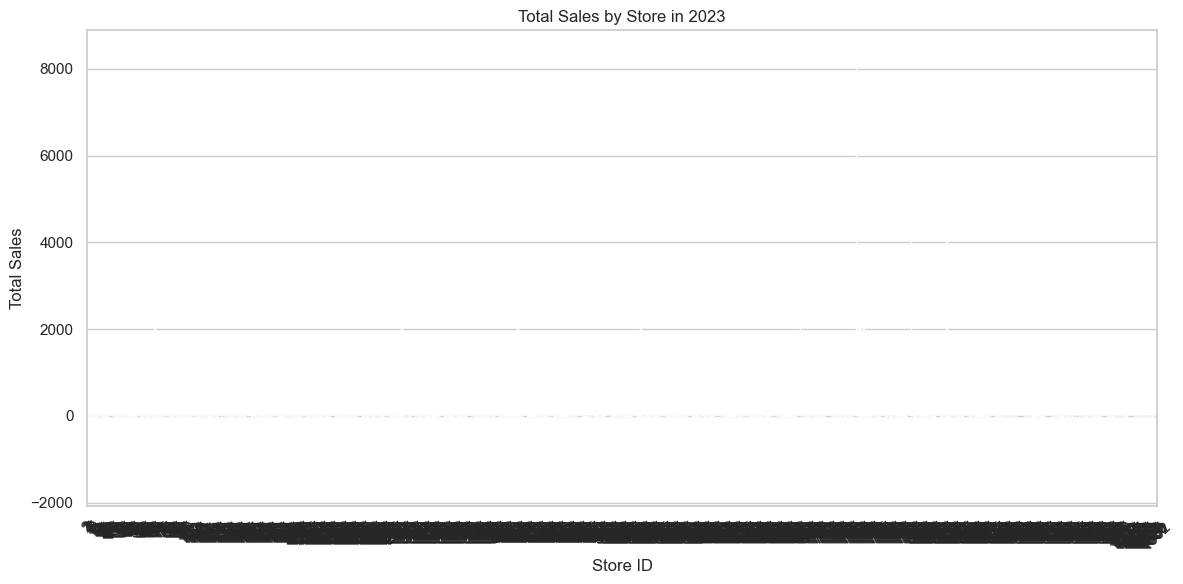

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
#Visualization: Total Sales by Store
# Set the style for the plots
sns.set(style="whitegrid")

# Plot total sales by store
plt.figure(figsize=(12, 6))
sns.barplot(x='store_id', y='sales_diff_2023', data=store_sales, palette='viridis')
plt.title('Total Sales by Store in 2023')
plt.xlabel('Store ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Top Performers: Stores like 742 and 829 show significantly high sales, indicating effective strategies worth analyzing for replication.

Underperformers: Stores such as 412 and 912 demonstrate negative sales, suggesting the need for intervention and strategic reassessment.

Sales Distribution: There’s a skewed sales distribution, with a few stores driving most revenue, indicating potential resource reallocation opportunities.







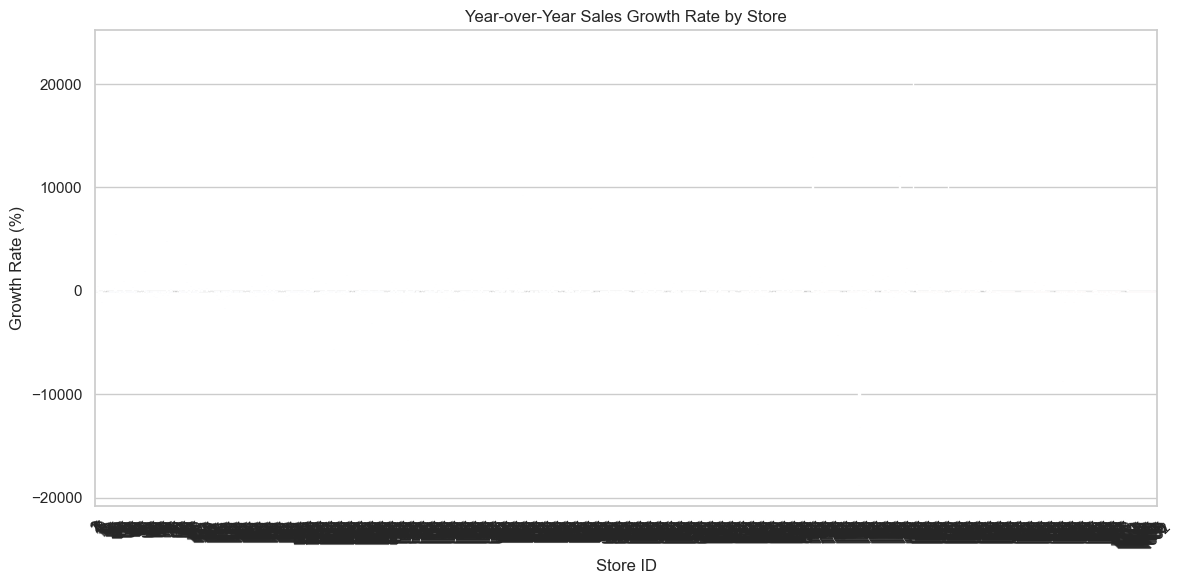

In [199]:
# Plot growth rates by store
#Visualization: Growth Rate by Store

plt.figure(figsize=(12, 6))
sns.barplot(x='store_id', y='growth_rate', data=store_sales, palette='coolwarm')
plt.title('Year-over-Year Sales Growth Rate by Store')
plt.xlabel('Store ID')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 
High Growth Stores: Some stores show exceptionally high growth rates, indicating successful sales strategies or improved market conditions that should be analyzed for best practices.

Negative Growth: Several stores display negative growth rates, highlighting potential issues such as declining customer interest or operational challenges that need to be addressed.

Overall Trends: The growth rate distribution can reveal which stores are expanding or contracting, guiding targeted strategies for improvement or investment in specific locations.

# Supply chain insights: identify the demand

In [147]:
# Assuming 'item' column represents the product, and you have a sales column
demand_data = df_clean.groupby('item')[['sales_diff_2023', 'sales_diff_2022']].sum().reset_index()

# Rename columns for clarity
demand_data.columns = ['item', 'total_demand_2023', 'total_demand_2022']


In [148]:
# Calculate year-over-year demand change
demand_data['demand_change'] = demand_data['total_demand_2023'] - demand_data['total_demand_2022']

# Calculate percentage change
demand_data['percent_change'] = (demand_data['demand_change'] / demand_data['total_demand_2022']) * 100


In [149]:
# Identify high demand products
high_demand_products = demand_data.nlargest(5, 'total_demand_2023')

# Identify low demand products
low_demand_products = demand_data.nsmallest(5, 'total_demand_2023')

print("High Demand Products:")
print(high_demand_products)

print("\nLow Demand Products:")
print(low_demand_products)


High Demand Products:
  item  total_demand_2023  total_demand_2022  demand_change  percent_change
0    A            20808.0             2764.0        18044.0      652.821997
1    B            19022.0             2197.0        16825.0      765.817023
2    C            14717.0             2121.0        12596.0      593.870816
3    D             9660.0             1218.0         8442.0      693.103448
4    E              533.0              722.0         -189.0      -26.177285

Low Demand Products:
  item  total_demand_2023  total_demand_2022  demand_change  percent_change
5    F             -163.0             1683.0        -1846.0     -109.685086
7    H             -130.0             1290.0        -1420.0     -110.077519
6    G               34.0             1815.0        -1781.0      -98.126722
4    E              533.0              722.0         -189.0      -26.177285
3    D             9660.0             1218.0         8442.0      693.103448


#
High Demand Growth: Products A, B, C, and D exhibit significant growth in demand for 2023 compared to 2022, indicating successful sales strategies, increased consumer interest, or effective marketing efforts that can be leveraged further.

Low Demand Concerns: Products F, H, and G show declining demand with negative total sales, suggesting potential quality issues, lack of marketing support, or shifts in consumer preferences that need to be investigated and addressed to avoid further declines.

Product E's Uncertainty: Product E experienced a decrease in demand but still has positive sales figures in 2023, which may require a tailored strategy to stabilize its market position, balancing between promotional activities and assessing product offerings.








# Visualization: Total Demand by Item

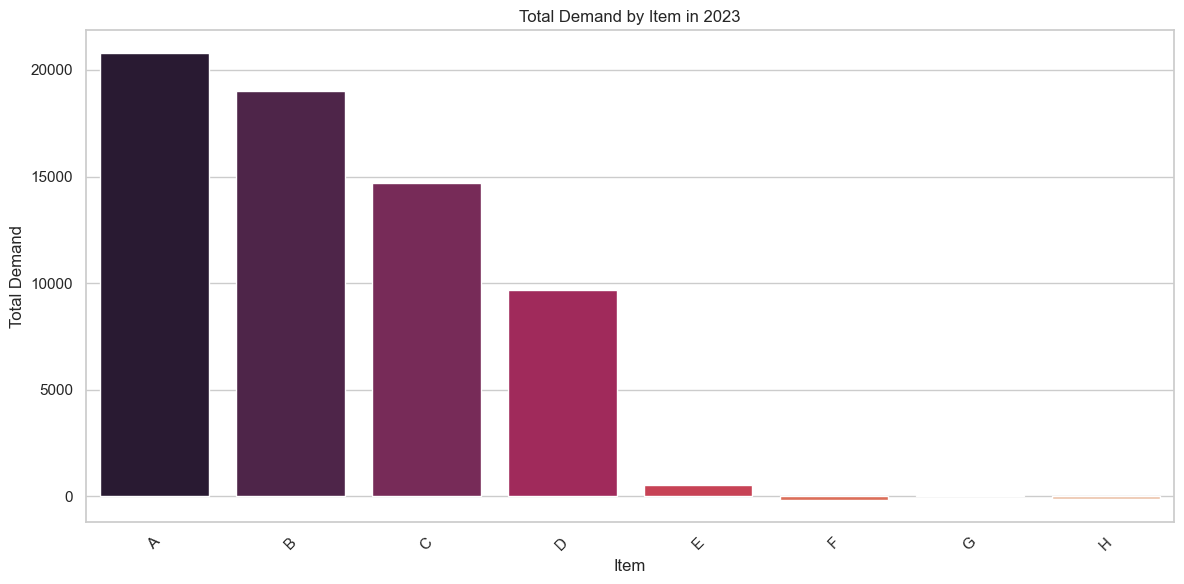

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot total demand by item
plt.figure(figsize=(12, 6))
sns.barplot(x='item', y='total_demand_2023', data=demand_data, palette='rocket')
plt.title('Total Demand by Item in 2023')
plt.xlabel('Item')
plt.ylabel('Total Demand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 
Visual Representation: The bar plot provides a clear visual representation of the demand for each item in 2023, making it easy to compare the performance of different products at a glance.


Identify Key Products: The items with the highest total demand can be easily identified, helping focus marketing efforts on successful products.

Demand Discrepancies: Items with low demand will stand out, allowing for further analysis on why these products are underperforming compared to others.

# Visualization: Year-over-Year Demand Change

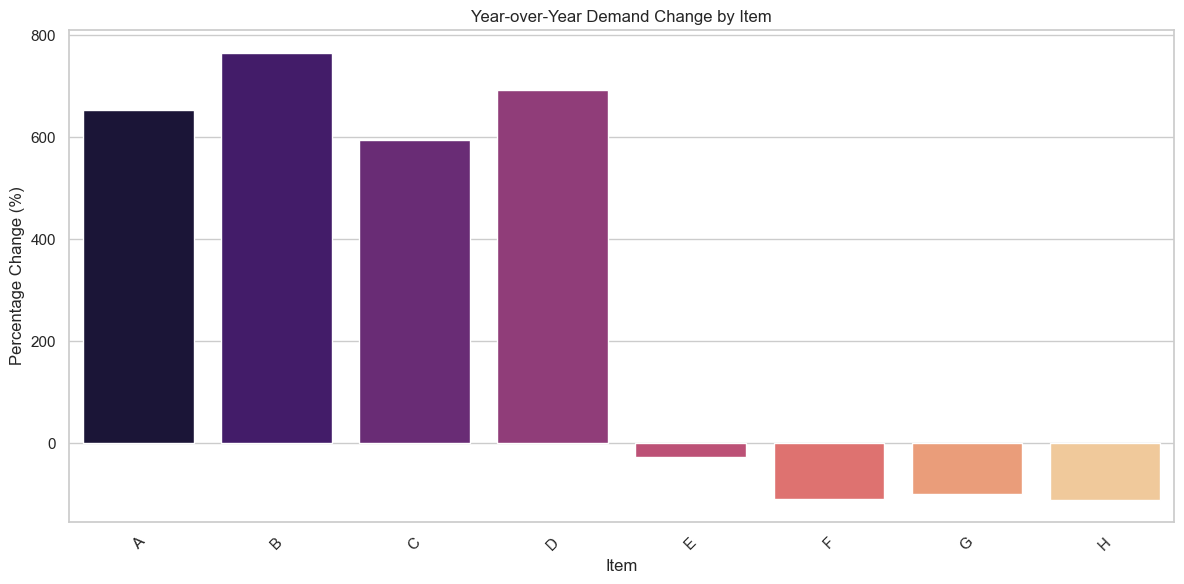

In [151]:
# Plot year-over-year demand change
plt.figure(figsize=(12, 6))
sns.barplot(x='item', y='percent_change', data=demand_data, palette='magma')
plt.title('Year-over-Year Demand Change by Item')
plt.xlabel('Item')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Insights from the Visualization:
Growth and Decline: The bar plot clearly shows which items have experienced significant growth or decline in demand compared to the previous year, providing insight into market trends.

Targeted Strategies: Items with high positive percentage changes can be targeted for increased marketing or stock, while those with negative changes may need investigation into potential causes or require strategic adjustments.

Product Portfolio Analysis: This visualization helps in assessing the overall health of the product portfolio by highlighting items that may require discontinuation or improvement based on consumer interest and demand fluctuations.

# Analyze Seasonality in Demand

In [152]:
# Reshape data for seasonal analysis (if applicable)
seasonal_demand = df_clean.groupby(['item', 'store_id']).sum().reset_index()

# Pivot table to see monthly demand for each item
monthly_demand = seasonal_demand.pivot_table(index='item', columns='store_id', values='sales_diff_2023', aggfunc='sum')

# Optionally visualize this monthly demand if the data is available over time


# Time series forecasting: identify tread, seasonality

In [153]:
# Check the current columns in df_clean
print(df_clean.columns)

# Identify the columns you want to melt (exclude sales_diff columns)
date_columns = ['2023/3', '2023/4', '2022/4', '2022/6']

# Reshape your DataFrame, only keeping item, store_id, and the relevant date columns
melted_df = df_clean.melt(id_vars=['item', 'store_id'], value_vars=date_columns, var_name='date', value_name='sales')

# Convert the 'date' column to datetime format
melted_df['date'] = pd.to_datetime(melted_df['date'], format='%Y/%m')

# Aggregate sales data by month
monthly_sales = melted_df.groupby('date')['sales'].sum().reset_index()

# Display the aggregated monthly sales
print(monthly_sales.head())


Index(['item', 'store_id', '2023/3', '2023/4', '2022/4', '2022/6',
       'sales_diff_2023', 'sales_diff_2022'],
      dtype='object')
        date     sales
0 2022-04-01   82563.0
1 2022-06-01   96373.0
2 2023-03-01   81792.0
3 2023-04-01  146273.0


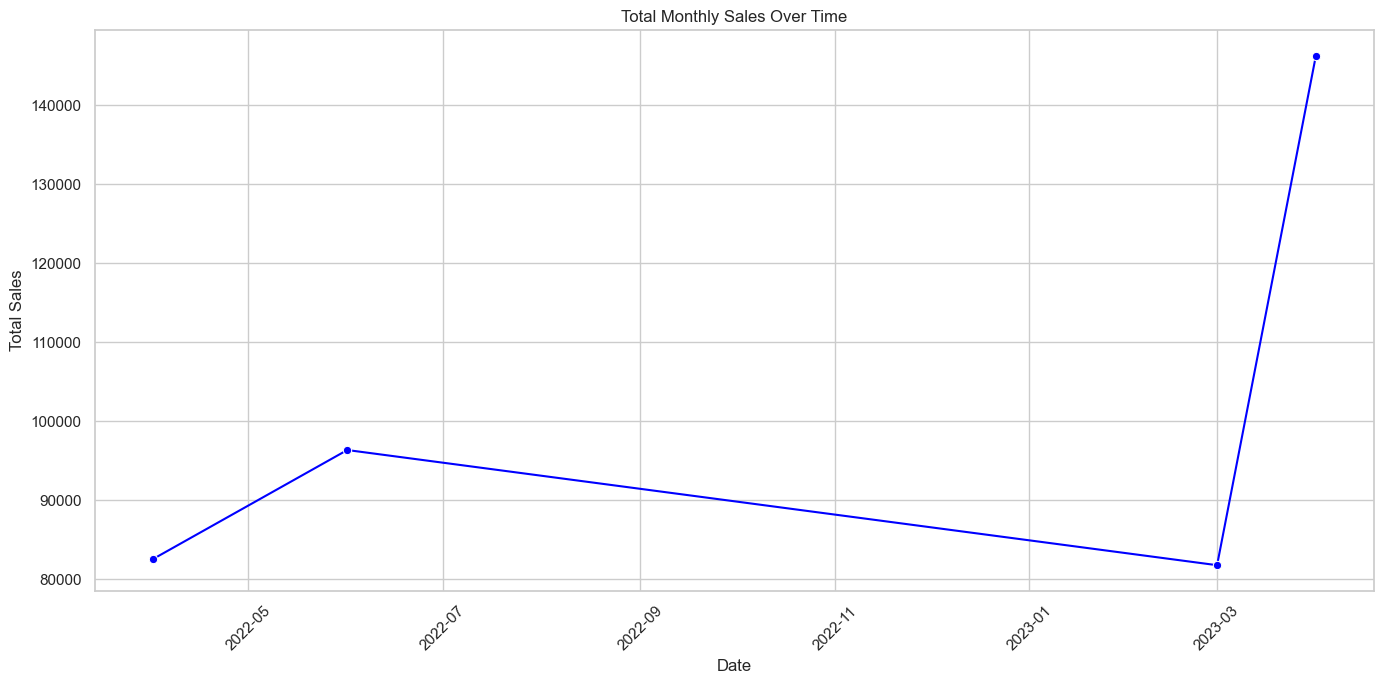

In [154]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=monthly_sales, x='date', y='sales', marker='o', color='blue')
plt.title('Total Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Insights from Time Series Plot
Trend Identification:

Upward or Downward Trends: Look at the slope of the line in your plot. If it generally trends upward, this indicates increasing sales over time. A downward slope would indicate a decline in sales. The rate of change can inform business decisions about resource allocation and inventory management.
Seasonality Detection:

Repeating Patterns: Identify any recurring peaks or troughs in your sales data. For instance, if there are spikes during certain months (e.g., holiday seasons or promotional periods), these patterns can inform future marketing strategies or stock levels.
Timing of Sales: If sales consistently rise or fall during certain times of the year, that information is critical for planning promotions or managing supply chains effectively.
Outliers:

Unexpected Changes: Look for any points that deviate significantly from the general trend. These could represent successful promotions, unexpected market events, or seasonal anomalies that need further investigation.

In [ ]:
# Identify the date columns in df_clean
# Assuming the dates are the columns from 2022 and 2023
date_columns = ['2022/4', '2022/6', '2023/3', '2023/4']  # Adjust this list based on your DataFrame

# Reshape your DataFrame
melted_df = df_clean.melt(id_vars=['item', 'store_id'], value_vars=date_columns, var_name='date', value_name='sales')

# Convert the 'date' column to datetime format
melted_df['date'] = pd.to_datetime(melted_df['date'], format='%Y/%m')

# Aggregate sales data by month
monthly_sales = melted_df.groupby('date')['sales'].sum().reset_index()

# Print the monthly_sales DataFrame to check
print(monthly_sales.head())


In [ ]:
melted_df['date'] = pd.to_datetime(melted_df['date'], format='%Y/%m')


In [ ]:
monthly_sales = melted_df.groupby('date')['sales'].sum().reset_index()


In [ ]:
monthly_sales.set_index('date', inplace=True)
monthly_sales = monthly_sales.asfreq('M')  # Set frequency to month-end


In [ ]:
print(monthly_sales.isnull().sum())


In [ ]:
monthly_sales.dropna(inplace=True)


In [ ]:
monthly_sales['sales'].fillna(method='ffill', inplace=True)  # Forward fill
# or
monthly_sales['sales'].interpolate(method='linear', inplace=True)  # Linear interpolation


In [ ]:
print(monthly_sales.head())
print(monthly_sales.columns)


In [171]:
import pandas as pd

# Check the original cleaned DataFrame
print("Original Cleaned DataFrame:")
print(df_clean.head())
print(df_clean.info())

# Reshape your DataFrame if needed
melted_df = df_clean.melt(id_vars=['item', 'store_id'], var_name='date', value_name='sales')

# Check the melted DataFrame
print("Melted DataFrame:")
print(melted_df.head())
print(melted_df.info())

# Aggregate sales data by month
monthly_sales = melted_df.groupby('date')['sales'].sum().reset_index()

# Check the resulting monthly sales DataFrame
print("Monthly Sales DataFrame:")
print(monthly_sales.head())
print(monthly_sales.info())


Original Cleaned DataFrame:
  item  store_id  2023/3  2023/4  2022/4  2022/6  sales_diff_2023  \
0    A         1     4.0    10.0    10.0    13.0              6.0   
1    A         2     5.0    10.0     5.0     6.0              5.0   
2    A         3    50.0    10.0    35.0    27.0            -40.0   
3    A         4    20.0    10.0    20.0    20.0            -10.0   
4    A         5    10.0    25.0    10.0    10.0             15.0   

   sales_diff_2022  
0              3.0  
1              1.0  
2             -8.0  
3              0.0  
4              0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5393 entries, 0 to 5392
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   item             5393 non-null   object 
 1   store_id         5393 non-null   int64  
 2   2023/3           5393 non-null   float64
 3   2023/4           5393 non-null   float64
 4   2022/4           5393 non-null   float64
 5 

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [169]:
import pandas as pd

# Load your data
data = pd.read_csv('data.csv')  # Replace with your actual file path

# Print the DataFrame to see the structure and column names
print(data.head())  # This will show the first few rows of your DataFrame
print(data.columns)  # This will print out the column names

# Melt the DataFrame to convert from wide to long format
data_melted = data.melt(id_vars=['item', 'store_id'], var_name='date', value_name='sales')

# Convert the date column to datetime format
data_melted['date'] = pd.to_datetime(data_melted['date'].str.replace('/', '-'))

# Set the date column as the index
data_melted.set_index('date', inplace=True)

# Resample the data to monthly frequency and sum the sales
monthly_sales = data_melted.resample('M').sum()  # Adjust based on your needs

#


  item  store_id  2023/1  2023/2  2023/3  2023/4  2023/5  2023/6  2023/7  \
0    A         1     NaN     NaN     4.0     NaN     5.0     NaN     5.0   
1    A         2     5.0     NaN     5.0     NaN     NaN     NaN     NaN   
2    A         3     5.0    10.0    50.0    10.0    30.0    10.0    30.0   
3    A         4    20.0     NaN    20.0     NaN    30.0     0.0     NaN   
4    A         5     NaN    20.0     NaN    25.0    20.0    10.0     NaN   

   2023/8  ...  2022/3  2022/4  2022/5  2022/6  2022/7  2022/8  2022/9  \
0     NaN  ...    10.0     NaN     NaN     NaN     NaN     NaN     NaN   
1     5.0  ...     5.0     5.0     NaN     6.0     5.0     NaN     2.0   
2    15.0  ...    20.0    35.0    20.0    27.0    21.0     NaN    20.0   
3    40.0  ...    10.0    20.0    10.0    20.0    20.0     NaN    20.0   
4    20.0  ...    10.0    10.0    10.0    10.0     NaN    20.0     NaN   

   2022/10  2022/11  2022/12  
0      NaN      NaN      NaN  
1      5.0      NaN      NaN  
2    

In [168]:
# Option 1: Drop missing values
monthly_sales.dropna(inplace=True)

# Option 2: Fill missing values
# monthly_sales.fillna(method='ffill', inplace=True)  # Forward fill
# or
# monthly_sales.interpolate(method='linear', inplace=True)  # Linear interpolation


# Time series graph of your monthly sales data.

Assuming monthly_sales has a single column named sales, your plotting code should look like this:

            sales
date             
2022-04-30    NaN
2022-05-31    NaN
2022-06-30    NaN
2022-07-31    NaN
2022-08-31    NaN
DatetimeIndex(['2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
               '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31'],
              dtype='datetime64[ns]', name='date', freq='M')


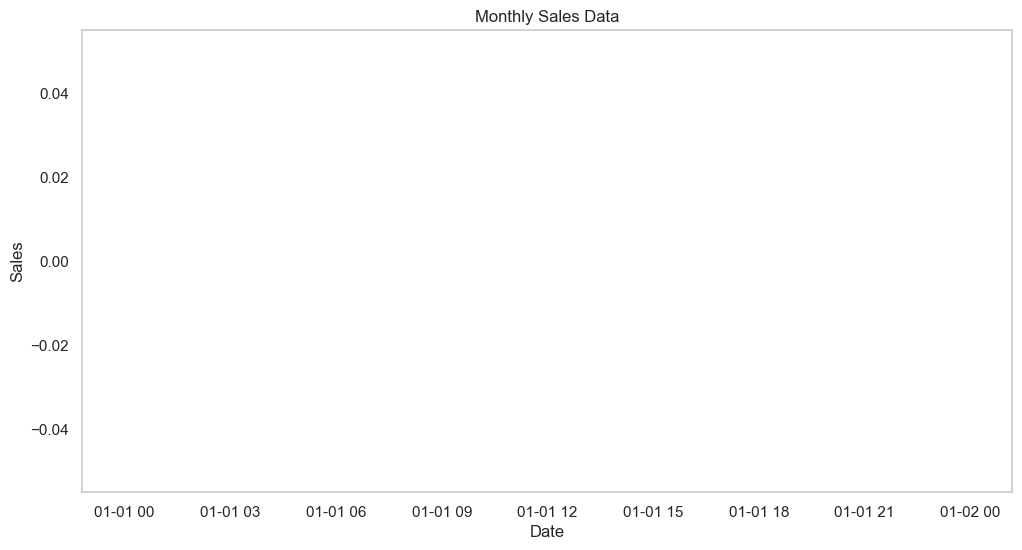

In [166]:
print(monthly_sales.head())
print(monthly_sales.index)
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['sales'], marker='o')  # Ensure you specify the column name
plt.title('Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid()
plt.show()


# Check Residuals:
It's important to analyze the residuals of the fitted model to ensure that they are approximately normally distributed and exhibit no autocorrelation. You can use plots like the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots.

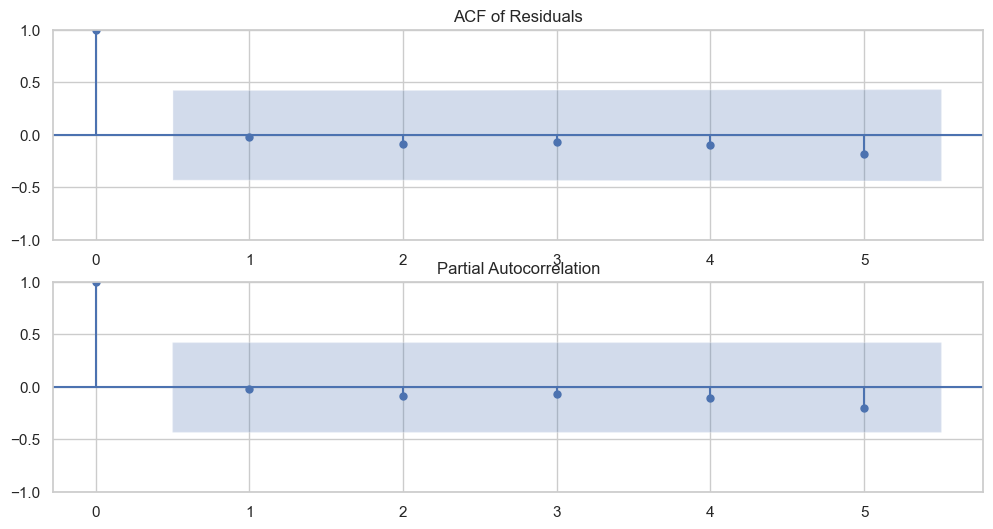

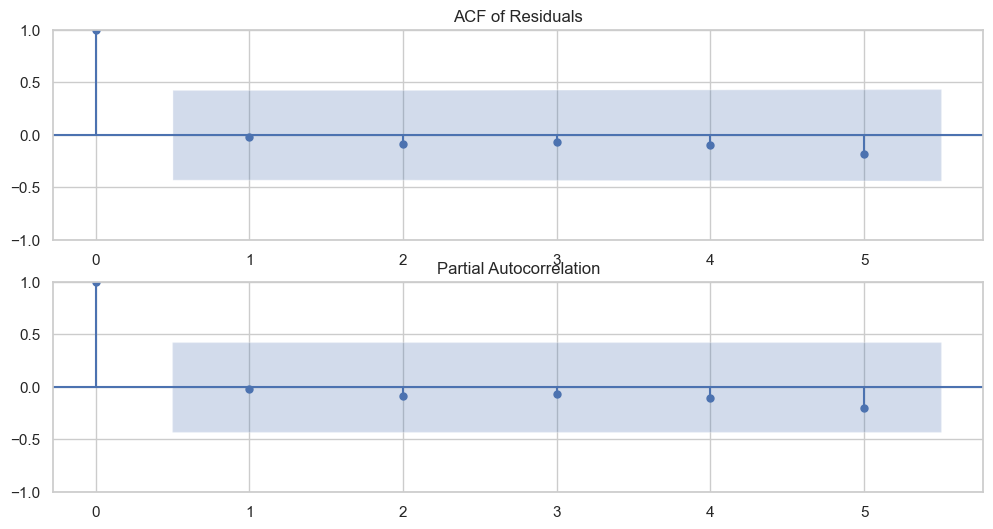

In [165]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF of the residuals
residuals = model_fit.resid

# Set the number of lags to a value less than 10 (for example, 5)
max_lags = 5  

plt.figure(figsize=(12, 6))

# ACF Plot
plt.subplot(211)
plot_acf(residuals, lags=max_lags, ax=plt.gca())
plt.title('ACF of Residuals')

# PACF Plot
plt.subplot(212)
plot_pacf(residuals, lags=max_lags, ax=plt.gca())


# Forecasting Future Sales

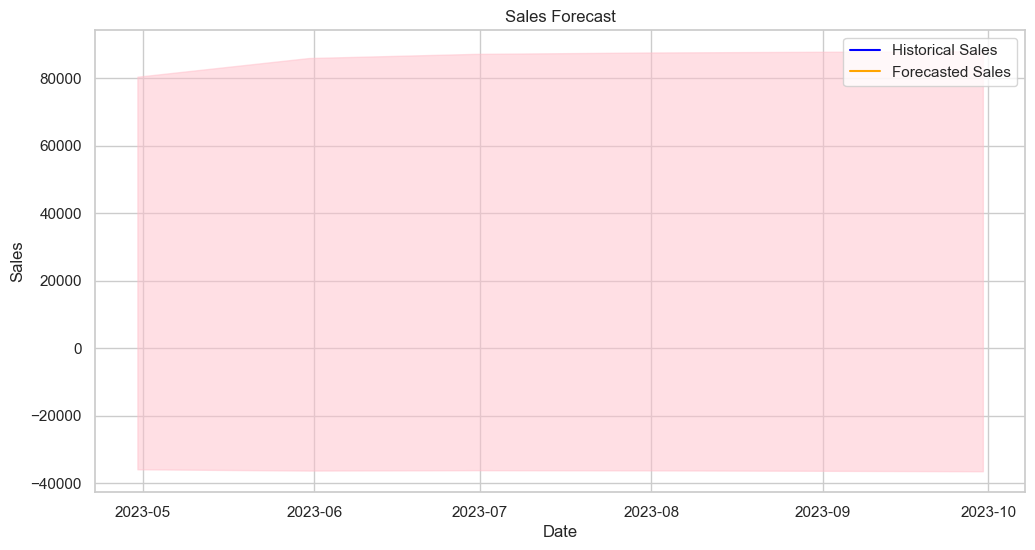

In [164]:
# Forecasting the next 6 months
forecast_steps = 6
forecast = model_fit.get_forecast(steps=forecast_steps)

# Get the predicted mean and confidence intervals
forecast_mean = forecast.predicted_mean
confidence_intervals = forecast.conf_int()

# Create a DataFrame to hold the forecast
forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_df = pd.DataFrame({'Forecasted Sales': forecast_mean}, index=forecast_index)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['sales'], label='Historical Sales', color='blue')
plt.plot(forecast_df['Forecasted Sales'], label='Forecasted Sales', color='orange')
plt.fill_between(forecast_df.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.5)
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [163]:
print(data.columns)

Index(['item', 'store_id', '2023/1', '2023/2', '2023/3', '2023/4', '2023/5',
       '2023/6', '2023/7', '2023/8', '2023/9', '2022/1', '2022/2', '2022/3',
       '2022/4', '2022/5', '2022/6', '2022/7', '2022/8', '2022/9', '2022/10',
       '2022/11', '2022/12', 'promotion'],
      dtype='object')


# A/B testing

# Adding a simulated promotion colum

In [162]:
import numpy as np

# Adding a simulated promotion column (randomly assign 50% to promotion)
np.random.seed(42)  # For reproducibility
data['promotion'] = np.random.choice([0, 1], size=len(data), p=[0.5, 0.5])

# Segment the data into control and test groups
control_group = data[data['promotion'] == 0]
test_group = data[data['promotion'] == 1]

# Verify the segmentation
print(f"Control group sample size: {len(control_group)}")
print(f"Test group sample size: {len(test_group)}")


Control group sample size: 2701
Test group sample size: 2692


# Compare average sales between control and test groups

In [161]:
# Calculate mean sales for control and test groups
control_sales_mean = control_group[['2023/1', '2023/2', '2023/3', '2023/4', '2023/5', 
                                    '2023/6', '2023/7', '2023/8', '2023/9']].mean().mean()

test_sales_mean = test_group[['2023/1', '2023/2', '2023/3', '2023/4', '2023/5', 
                              '2023/6', '2023/7', '2023/8', '2023/9']].mean().mean()

print(f"Average sales in control group: {control_sales_mean}")
print(f"Average sales in test group: {test_sales_mean}")


Average sales in control group: 16.859364489248996
Average sales in test group: 17.733008203642736


In [160]:
# Check for missing values in the sales columns
print(data[['2023/1', '2023/2', '2023/3', '2023/4', '2023/5', 
            '2023/6', '2023/7', '2023/8', '2023/9']].isnull().sum())



2023/1    4117
2023/2    3968
2023/3    3401
2023/4    2895
2023/5    4036
2023/6    4267
2023/7    3789
2023/8    4027
2023/9    4224
dtype: int64


In [159]:
# Remove rows with missing values in the sales columns
control_group_clean = control_group.dropna(subset=['2023/1', '2023/2', '2023/3', '2023/4', '2023/5', 
                                                   '2023/6', '2023/7', '2023/8', '2023/9'])

test_group_clean = test_group.dropna(subset=['2023/1', '2023/2', '2023/3', '2023/4', '2023/5', 
                                             '2023/6', '2023/7', '2023/8', '2023/9'])


In [158]:
# Flatten the cleaned sales data
control_sales_clean = control_group_clean[['2023/1', '2023/2', '2023/3', '2023/4', '2023/5', 
                                           '2023/6', '2023/7', '2023/8', '2023/9']].values.flatten()

test_sales_clean = test_group_clean[['2023/1', '2023/2', '2023/3', '2023/4', '2023/5', 
                                     '2023/6', '2023/7', '2023/8', '2023/9']].values.flatten()

# Perform the t-test on the cleaned data
t_stat, p_value = stats.ttest_ind(control_sales_clean, test_sales_clean)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


T-statistic: -0.9540420893045157
P-value: 0.3405385674357224


# "Sales Trends Analysis: Effect of Promotions on Consumer Behavior

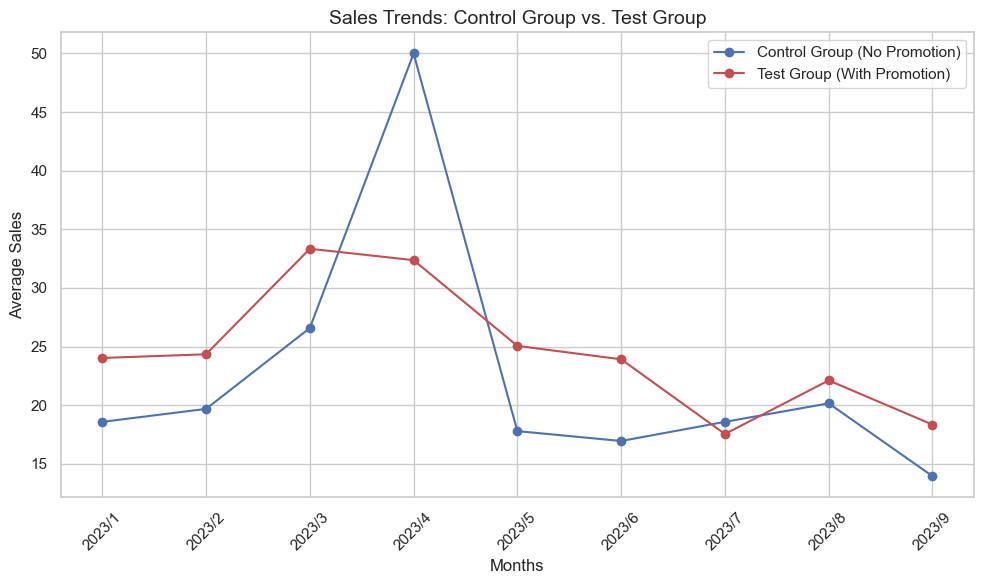

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Monthly columns for 2023
months = ['2023/1', '2023/2', '2023/3', '2023/4', '2023/5', '2023/6', '2023/7', '2023/8', '2023/9']

# Calculate average sales per month for both groups
control_avg_sales = control_group_clean[months].mean()
test_avg_sales = test_group_clean[months].mean()

# Plot the sales trends
plt.plot(months, control_avg_sales, label='Control Group (No Promotion)', marker='o', linestyle='-', color='b')
plt.plot(months, test_avg_sales, label='Test Group (With Promotion)', marker='o', linestyle='-', color='r')

# Adding titles and labels
plt.title('Sales Trends: Control Group vs. Test Group', fontsize=14)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# "Sales Distribution Comparison: Control vs. Test Group"


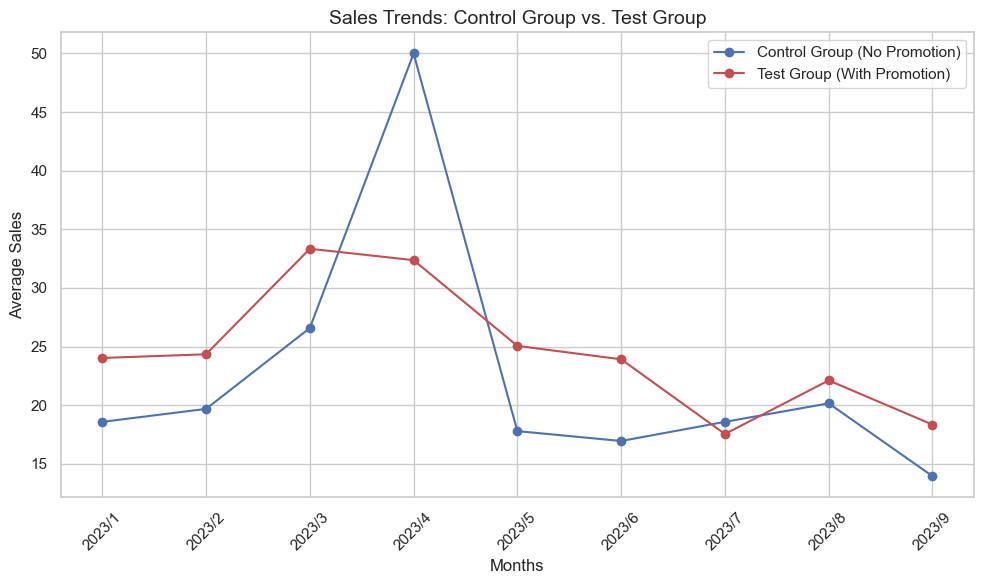

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Monthly columns for 2023
months = ['2023/1', '2023/2', '2023/3', '2023/4', '2023/5', '2023/6', '2023/7', '2023/8', '2023/9']

# Calculate average sales per month for both groups
control_avg_sales = control_group_clean[months].mean()
test_avg_sales = test_group_clean[months].mean()

# Plot the sales trends
plt.plot(months, control_avg_sales, label='Control Group (No Promotion)', marker='o', linestyle='-', color='b')
plt.plot(months, test_avg_sales, label='Test Group (With Promotion)', marker='o', linestyle='-', color='r')

# Adding titles and labels
plt.title('Sales Trends: Control Group vs. Test Group', fontsize=14)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)

# Add legend
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [172]:
# Interpret the p-value
alpha = 0.05  # Significance level

if p_value < alpha:
    conclusion = "Reject the null hypothesis: There is a significant difference in sales between control and test groups."
else:
    conclusion = "Fail to reject the null hypothesis: There is no significant difference in sales between control and test groups."

print("T-test Conclusion:", conclusion)

# Add a brief summary of the findings
summary = f"""
Average Sales in Control Group: {control_sales_mean:.2f}
Average Sales in Test Group: {test_sales_mean:.2f}

Conclusion: {conclusion}
"""

print(summary)


T-test Conclusion: Fail to reject the null hypothesis: There is no significant difference in sales between control and test groups.

Average Sales in Control Group: 16.86
Average Sales in Test Group: 17.73

Conclusion: Fail to reject the null hypothesis: There is no significant difference in sales between control and test groups.



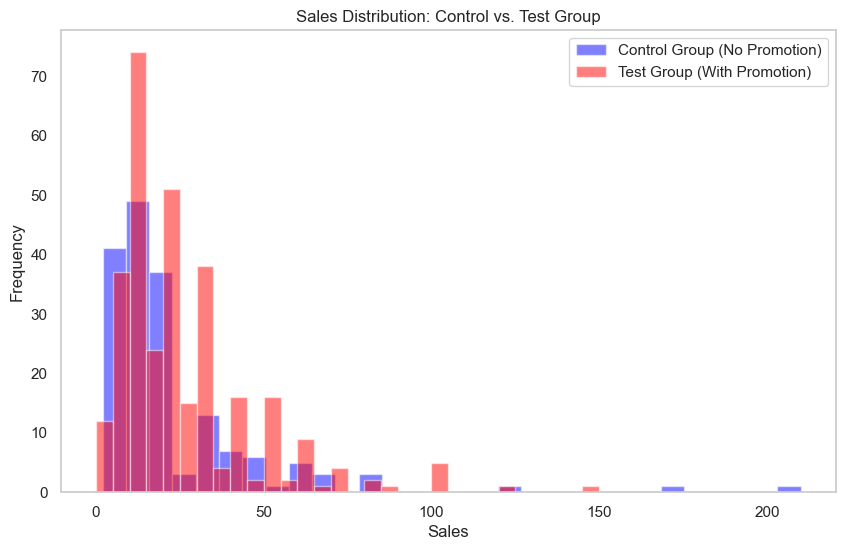

In [173]:
# Additional Distribution Plot
plt.figure(figsize=(10, 6))
plt.hist(control_sales_clean, bins=30, alpha=0.5, label='Control Group (No Promotion)', color='blue')
plt.hist(test_sales_clean, bins=30, alpha=0.5, label='Test Group (With Promotion)', color='red')
plt.title('Sales Distribution: Control vs. Test Group')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()


In [174]:
# Generate a summary report
summary = {
    "Control Group Average Sales": control_sales_mean,
    "Test Group Average Sales": test_sales_mean,
    "T-statistic": t_stat,
    "P-value": p_value,
    "Conclusion": "Fail to reject the null hypothesis: No significant difference."
}

# Convert to DataFrame for better visualization
summary_df = pd.DataFrame(summary.items(), columns=["Metric", "Value"])
print(summary_df)


                        Metric  \
0  Control Group Average Sales   
1     Test Group Average Sales   
2                  T-statistic   
3                      P-value   
4                   Conclusion   

                                               Value  
0                                          16.859364  
1                                          17.733008  
2                                          -0.954042  
3                                           0.340539  
4  Fail to reject the null hypothesis: No signifi...  


# Generate the Summary DataFrame

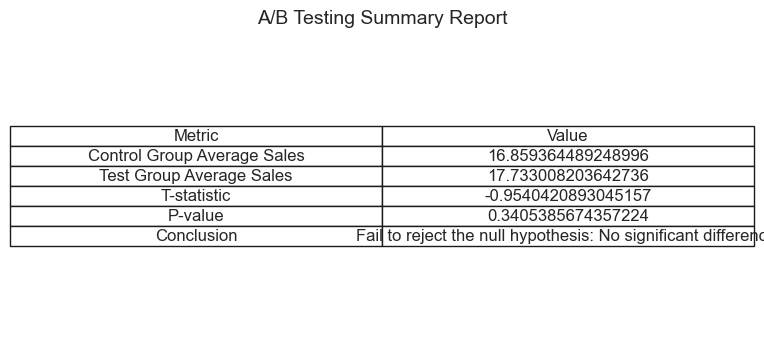

In [175]:
import matplotlib.pyplot as plt

# Create a figure
fig, ax = plt.subplots(figsize=(8, 4))  # Set the size of the figure

# Hide axes
ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, cellLoc='center', loc='center')

# Set font size for the table
table.auto_set_font_size(False)
table.set_fontsize(12)

# Adjust the column width
table.scale(1.2, 1.2)

# Title for the table
plt.title('A/B Testing Summary Report', fontsize=14)
plt.show()


# Average Sales Comparison Bar Chart
A bar chart can clearly show the average sales for both the control and test groups.

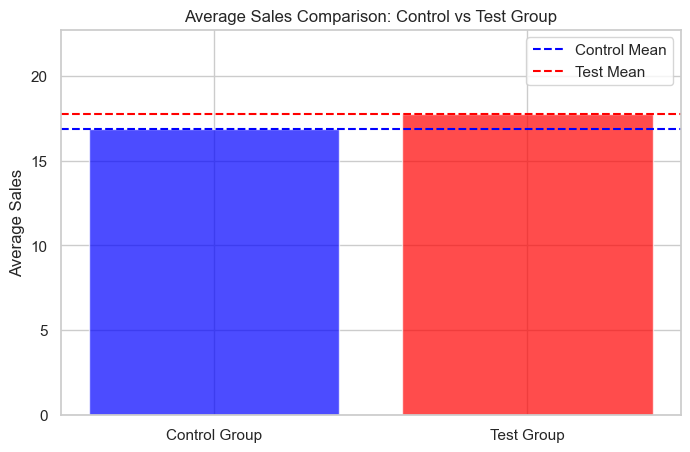

In [178]:
import matplotlib.pyplot as plt

# Create a bar chart to compare average sales
labels = ['Control Group', 'Test Group']
averages = [control_sales_mean, test_sales_mean]

plt.figure(figsize=(8, 5))
plt.bar(labels, averages, color=['blue', 'red'], alpha=0.7)
plt.ylabel('Average Sales')
plt.title('Average Sales Comparison: Control vs Test Group')
plt.ylim(0, max(averages) + 5)  # Adjust y-axis for better visibility
plt.axhline(y=averages[0], color='blue', linestyle='--', label='Control Mean')
plt.axhline(y=averages[1], color='red', linestyle='--', label='Test Mean')
plt.legend()
plt.show()


# T-test Results Visualization
Visualizing the distributions of sales can give insights into the data spread and significance of the results.

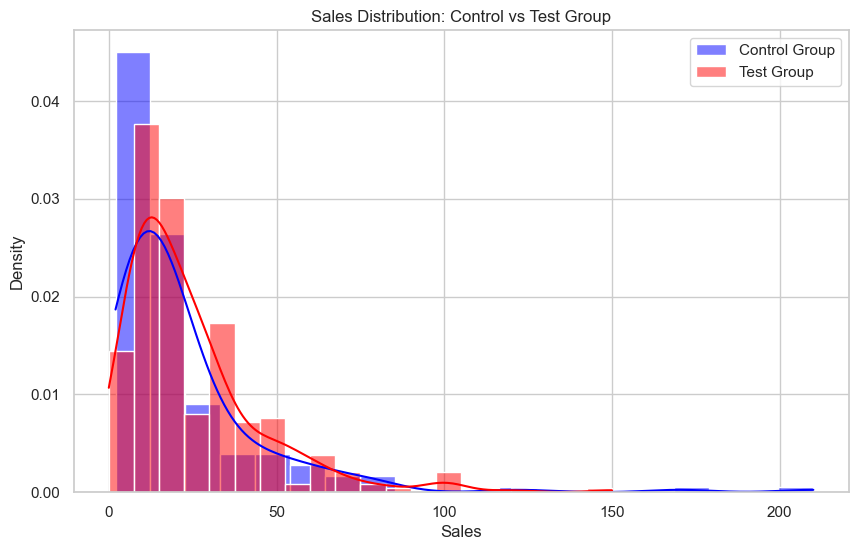

In [179]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(control_sales_clean, bins=20, color='blue', label='Control Group', kde=True, stat='density', alpha=0.5)
sns.histplot(test_sales_clean, bins=20, color='red', label='Test Group', kde=True, stat='density', alpha=0.5)
plt.title('Sales Distribution: Control vs Test Group')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.legend()
plt.show()


# Boxplot of Sales Data
A boxplot can show the median, quartiles, and potential outliers in your sales data.

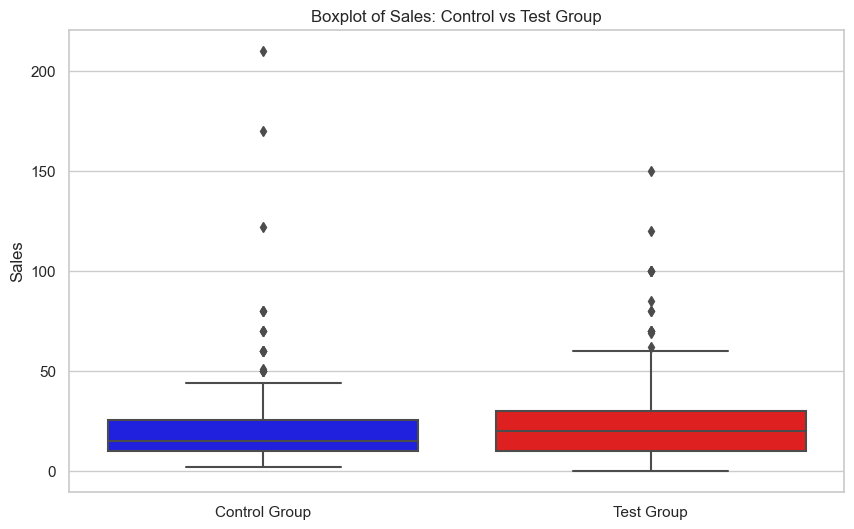

In [180]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=[control_sales_clean, test_sales_clean], palette=['blue', 'red'])
plt.xticks([0, 1], ['Control Group', 'Test Group'])
plt.ylabel('Sales')
plt.title('Boxplot of Sales: Control vs Test Group')
plt.show()


# Sales Trends Over Time

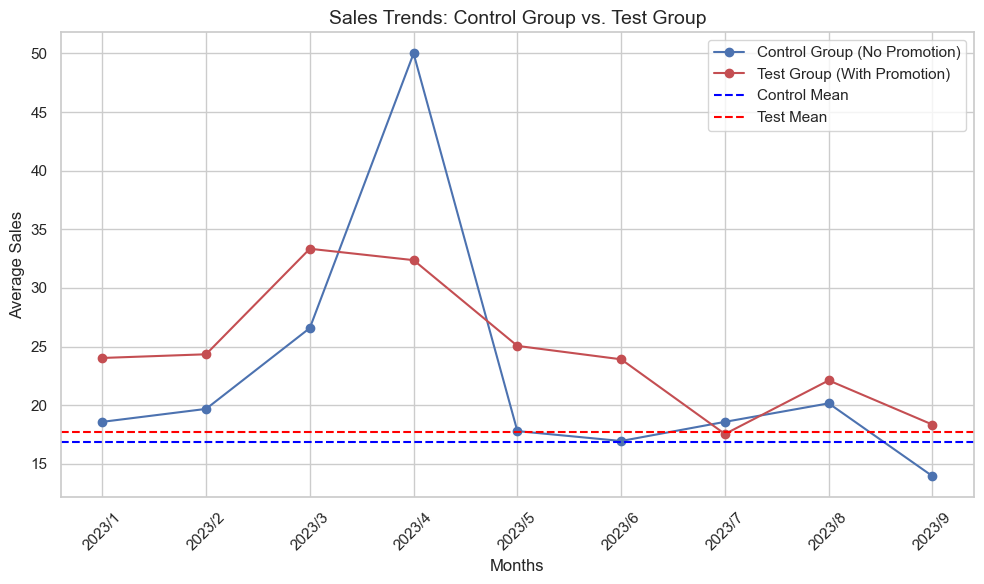

In [181]:
# Enhanced sales trends with annotations
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

plt.plot(months, control_avg_sales, label='Control Group (No Promotion)', marker='o', linestyle='-', color='b')
plt.plot(months, test_avg_sales, label='Test Group (With Promotion)', marker='o', linestyle='-', color='r')

plt.title('Sales Trends: Control Group vs. Test Group', fontsize=14)
plt.xlabel('Months', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.axhline(y=control_sales_mean, color='blue', linestyle='--', label='Control Mean')
plt.axhline(y=test_sales_mean, color='red', linestyle='--', label='Test Mean')
plt.legend()
plt.tight_layout()
plt.show()


In [188]:
df_clean.head()  # To view the first few rows of df_clean
monthly_sales.head()  # To view the first few rows of monthly_sales


,date,sales
0,2022/4,82563.0
1,2022/6,96373.0
2,2023/3,81792.0
3,2023/4,146273.0
4,sales_diff_2022,13810.0


In [186]:
%whos


Variable                   Type                        Data/Info
----------------------------------------------------------------
ARIMA                      type                        <class 'statsmodels.tsa.arima.model.ARIMA'>
actual_date_column_name    str                         your_actual_date_column_name
alpha                      float                       0.05
averages                   list                        n=2
ax                         Axes                        Axes(0.125,0.11;0.775x0.77)
bottom_stores              DataFrame                        store_id  sales_diff<...> -3.666667   581.818182  
classify_product           function                    <function classify_product at 0x0000022F3616AB60>
conclusion                 str                         Fail to reject the null h<...> control and test groups.
confidence_intervals       DataFrame                                lower sales <...>6493.820683  87998.381218
control_avg_sales          Series              

In [190]:
print(df_clean.columns)


Index(['item', 'store_id', '2023/3', '2023/4', '2022/4', '2022/6',
       'sales_diff_2023', 'sales_diff_2022'],
      dtype='object')


In [191]:
# Melt the DataFrame to reshape it so that the '2023/3', '2023/4', etc. become part of a 'date' column
cleaned_df = pd.melt(df_clean, id_vars=['item', 'store_id'], var_name='date', value_name='sales')

# Remove rows where the 'date' column has non-date values
cleaned_df = cleaned_df[cleaned_df['date'].str.match(r'^\d{4}/\d{1,2}$')]

# Save cleaned data to CSV
cleaned_df.to_csv('cleaned_data.csv', index=False)


In [192]:
cleaned_df.to_csv('cleaned_data.csv', index=False)


In [193]:
print(df_clean.columns)

Index(['item', 'store_id', '2023/3', '2023/4', '2022/4', '2022/6',
       'sales_diff_2023', 'sales_diff_2022'],
      dtype='object')


In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5393 entries, 0 to 5392
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item      5393 non-null   object 
 1   store_id  5393 non-null   int64  
 2   2023/1    1276 non-null   float64
 3   2023/2    1425 non-null   float64
 4   2023/3    1992 non-null   float64
 5   2023/4    2498 non-null   float64
 6   2023/5    1357 non-null   float64
 7   2023/6    1126 non-null   float64
 8   2023/7    1604 non-null   float64
 9   2023/8    1366 non-null   float64
 10  2023/9    1169 non-null   float64
 11  2022/1    942 non-null    float64
 12  2022/2    1010 non-null   float64
 13  2022/3    1074 non-null   float64
 14  2022/4    1954 non-null   float64
 15  2022/5    1447 non-null   float64
 16  2022/6    1623 non-null   float64
 17  2022/7    891 non-null    float64
 18  2022/8    832 non-null    float64
 19  2022/9    1000 non-null   float64
 20  2022/10   1516 non-null   floa

In [196]:
print(data.columns)

Index(['item', 'store_id', '2023/1', '2023/2', '2023/3', '2023/4', '2023/5',
       '2023/6', '2023/7', '2023/8', '2023/9', '2022/1', '2022/2', '2022/3',
       '2022/4', '2022/5', '2022/6', '2022/7', '2022/8', '2022/9', '2022/10',
       '2022/11', '2022/12'],
      dtype='object')
